In [ ]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 25.9 MB/s eta 0:00:00


In [ ]:
import os
from nilearn import plotting
from nilearn import image
from nilearn.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import nibabel as nib
import pandas as pd
from sklearn import svm
from sklearn import metrics

In [ ]:
# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
luteo = r'/content/drive/MyDrive/intento_cosas/1ALFF_lut_mean_pca.csv'
menstr = r'/content/drive/MyDrive/intento_cosas/1ALFF_men_mean_pca.csv'
prolif = r'/content/drive/MyDrive/intento_cosas/1ALFF_pr_mean_pca.csv'

Mounted at /content/drive


In [ ]:
data_lut = pd.read_csv(luteo, index_col=0)
data_lut = data_lut.sort_values(['file_name'])
data_lut

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20
file_name,,,,,,,,,,,,,,,,,,,,
rsfc_103515_01.nii.gz_ALFF+tlrc.BRIK,-546253.038620,264706.438786,-2494.885104,-58623.989484,-75290.825507,-1.108390e+05,49942.401827,-49387.611717,131400.211713,20879.146568,-161554.034326,-140530.478545,-116588.864619,94997.985626,-43510.915966,-166346.151561,77304.531366,138184.083911,199506.503227,-573573.853339
rsfc_103515_01.nii.gz_ALFF+tlrc.HEAD,-546253.038620,264706.438786,-2494.885104,-58623.989484,-75290.825507,-1.108390e+05,49942.401827,-49387.611717,131400.211713,20879.146568,-161554.034326,-140530.478545,-116588.864619,94997.985626,-43510.915966,-166346.151561,77304.531366,138184.083911,199506.503227,-573573.853339
rsfc_103515_02.nii.gz_ALFF+tlrc.BRIK,-521123.584610,197154.019090,-56776.821664,-65243.436342,-106496.140804,-1.256297e+05,49034.993518,-57371.937459,118311.293100,30972.925688,-143933.955277,-147749.614699,-108372.020945,113983.628879,-45731.875047,-162530.021374,101749.707786,157792.960764,214143.482219,-609955.772827
rsfc_103515_02.nii.gz_ALFF+tlrc.HEAD,-521123.584610,197154.019090,-56776.821664,-65243.436342,-106496.140804,-1.256297e+05,49034.993518,-57371.937459,118311.293100,30972.925688,-143933.955277,-147749.614699,-108372.020945,113983.628879,-45731.875047,-162530.021374,101749.707786,157792.960764,214143.482219,-609955.772827
rsfc_103515_03.nii.gz_ALFF+tlrc.BRIK,-129505.836447,4841.137257,-84052.696111,-69479.645174,-149447.449528,-1.112194e+05,59934.041768,-46499.525760,152675.569831,50709.780376,-104112.965883,-116702.725705,-103098.194236,138406.735664,-47460.370054,-204723.504771,134477.261792,224918.491379,268419.266577,-744788.001413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rsfc_822244_01.nii.gz_ALFF+tlrc.HEAD,-5444.524389,-237172.074867,47410.101139,146765.133951,249496.662173,1.369946e+06,126608.930227,-495615.596764,-321939.413715,86108.241707,-51753.804087,-86241.771040,-200215.420630,127198.686110,-29050.049784,1916.967165,118777.603438,9653.415129,-9981.712917,-20093.287931
rsfc_822244_02.nii.gz_ALFF+tlrc.BRIK,-217783.903988,-242501.886384,49899.725853,154290.025653,353064.019866,1.682978e+06,113361.517677,-585630.900587,-372203.138103,12214.087378,-22566.378499,-104631.798768,-234742.103416,184198.960151,-28625.752719,15815.027252,111258.108788,-14101.664915,-6378.853933,-3492.592504
rsfc_822244_02.nii.gz_ALFF+tlrc.HEAD,-217783.903988,-242501.886384,49899.725853,154290.025653,353064.019866,1.682978e+06,113361.517677,-585630.900587,-372203.138103,12214.087378,-22566.378499,-104631.798768,-234742.103416,184198.960151,-28625.752719,15815.027252,111258.108788,-14101.664915,-6378.853933,-3492.592504


In [ ]:
data_men = pd.read_csv(menstr, index_col=0)
data_men = data_men.sort_values(['file_name'])
data_men

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20
file_name,,,,,,,,,,,,,,,,,,,,
rsfc_114823_01.nii.gz_ALFF+tlrc.BRIK,-2.720804e+05,1.063434e+05,81042.552558,87977.162766,191457.386973,-4.002363e+04,13763.374720,-96917.167939,-24848.059760,49173.959514,603685.887782,744235.354063,-671040.458847,223619.745360,8222.473903,-49396.282316,30976.833622,59884.442404,36212.298020,-10211.885560
rsfc_114823_01.nii.gz_ALFF+tlrc.HEAD,-2.720804e+05,1.063434e+05,81042.552558,87977.162766,191457.386973,-4.002363e+04,13763.374720,-96917.167939,-24848.059760,49173.959514,603685.887782,744235.354063,-671040.458847,223619.745360,8222.473903,-49396.282316,30976.833622,59884.442404,36212.298020,-10211.885560
rsfc_114823_02.nii.gz_ALFF+tlrc.BRIK,-2.839333e+05,1.000301e+05,147036.362716,74960.632876,244529.305084,-2.166139e+04,-1400.098939,-94214.579958,-13681.060288,85368.655144,614507.006186,819224.504354,-681090.007574,229920.687286,13996.805660,-75118.263760,-50.213687,9786.170322,453.393268,-38382.524810
rsfc_114823_02.nii.gz_ALFF+tlrc.HEAD,-2.839333e+05,1.000301e+05,147036.362716,74960.632876,244529.305084,-2.166139e+04,-1400.098939,-94214.579958,-13681.060288,85368.655144,614507.006186,819224.504354,-681090.007574,229920.687286,13996.805660,-75118.263760,-50.213687,9786.170322,453.393268,-38382.524810
rsfc_114823_03.nii.gz_ALFF+tlrc.BRIK,-2.794382e+05,7.775294e+04,138503.711748,39400.863430,221163.388237,-8.860030e+03,21460.573107,-64791.990416,-20108.430841,96880.648206,599814.760822,790636.771755,-635223.166678,238559.190900,17703.979516,-80206.372377,13604.630531,17755.022173,30995.867252,-28707.196657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rsfc_902242_01.nii.gz_ALFF+tlrc.HEAD,2.749922e+06,-2.132239e+06,464860.441721,322523.653987,38241.641075,2.102990e+06,437907.456904,-260244.094325,-88942.334016,-289700.309381,10490.446204,72885.766404,78186.099028,24914.462351,-78491.756488,-81332.782417,-433.969775,57479.531542,-13949.523848,-9855.890487
rsfc_902242_02.nii.gz_ALFF+tlrc.BRIK,-2.405337e+05,-7.118031e+05,45838.600437,85505.757272,-31829.132864,5.306549e+05,49046.068277,-59562.975682,-42713.903469,-108381.015920,-37488.347103,-63441.845974,22095.137613,54501.700745,-9106.970395,-11539.700625,-35944.819195,-36113.964221,23242.618315,54768.762605
rsfc_902242_02.nii.gz_ALFF+tlrc.HEAD,-2.405337e+05,-7.118031e+05,45838.600437,85505.757272,-31829.132864,5.306549e+05,49046.068277,-59562.975682,-42713.903469,-108381.015920,-37488.347103,-63441.845974,22095.137613,54501.700745,-9106.970395,-11539.700625,-35944.819195,-36113.964221,23242.618315,54768.762605


In [ ]:
data_pr = pd.read_csv(prolif, index_col=0)
data_pr = data_pr.sort_values(['file_name'])
data_pr

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20
file_name,,,,,,,,,,,,,,,,,,,,
rsfc_101915_01.nii.gz_ALFF+tlrc.BRIK,-4.714775e+05,92261.998794,169601.816391,-93089.068396,204163.454226,97701.467022,-350132.735367,4.360271e+05,-277255.156638,-339559.095443,-46105.121811,-80775.983624,-194859.156257,-161908.600905,-3680.453540,14069.740655,-106110.696946,92718.686373,-147708.460325,-62661.979330
rsfc_101915_01.nii.gz_ALFF+tlrc.HEAD,-4.714775e+05,92261.998794,169601.816391,-93089.068396,204163.454226,97701.467022,-350132.735367,4.360271e+05,-277255.156638,-339559.095443,-46105.121811,-80775.983624,-194859.156257,-161908.600905,-3680.453540,14069.740655,-106110.696946,92718.686373,-147708.460325,-62661.979330
rsfc_101915_02.nii.gz_ALFF+tlrc.BRIK,3.560831e+05,-262815.922479,-39092.125558,-186436.435134,270504.200132,8004.960219,-562209.254975,8.262634e+05,-359405.793225,-513734.435130,-92162.280815,-111009.847433,-245116.739128,-278102.103785,50151.993788,44023.777919,-206602.653924,61463.666108,-180734.779568,-85171.421602
rsfc_101915_02.nii.gz_ALFF+tlrc.HEAD,3.560831e+05,-262815.922479,-39092.125558,-186436.435134,270504.200132,8004.960219,-562209.254975,8.262634e+05,-359405.793225,-513734.435130,-92162.280815,-111009.847433,-245116.739128,-278102.103785,50151.993788,44023.777919,-206602.653924,61463.666108,-180734.779568,-85171.421602
rsfc_101915_03.nii.gz_ALFF+tlrc.BRIK,1.746887e+06,-754218.699163,-228727.787019,-332944.939124,563845.183568,-84400.823152,-962919.726300,1.583253e+06,-594785.239039,-820034.846828,-213794.759894,-166723.679483,-378614.193882,-484354.916059,116340.500002,35831.378087,-249910.494921,8319.071787,-202114.839005,-106077.121577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rsfc_993675_01.nii.gz_ALFF+tlrc.HEAD,-6.524111e+05,153029.084217,133861.509222,-13334.518638,-51210.086700,48984.389551,5374.874339,-1.130015e+05,-37687.627904,-11194.173184,-14867.206888,-34447.908877,-1900.472857,-34676.247734,-10541.009263,38880.804856,-15968.733216,54131.628546,-43841.543873,33725.944156
rsfc_993675_02.nii.gz_ALFF+tlrc.BRIK,-6.236281e+05,161110.906151,96618.689045,-3237.156003,-56058.978690,28954.708599,16499.072795,-1.076411e+05,-31454.237623,21943.145916,-41321.663798,-21636.722727,-1356.696455,-59467.930318,-1427.734117,65514.405341,-8823.779182,64133.431765,-32289.532396,25610.329790
rsfc_993675_02.nii.gz_ALFF+tlrc.HEAD,-6.236281e+05,161110.906151,96618.689045,-3237.156003,-56058.978690,28954.708599,16499.072795,-1.076411e+05,-31454.237623,21943.145916,-41321.663798,-21636.722727,-1356.696455,-59467.930318,-1427.734117,65514.405341,-8823.779182,64133.431765,-32289.532396,25610.329790


In [ ]:
from sklearn.model_selection import train_test_split

# 2. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['group'] = '0'
data_pr['group'] = '1'
data_lut['group'] = '2'

# 2. Definir función para tomar el primer tercio de un DataFrame
mens = 19*3 #int(len(data_men)*0.7)
prlof = 30*3 #int(len(data_pr)*0.7)
lut = 19*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train = data_men.iloc[:mens]
data_pr_train = data_pr.iloc[:prlof]
data_lut_train = data_lut.iloc[:lut]

data_men_test = data_men.iloc[mens:]
data_pr_test = data_pr.iloc[prlof:]
data_lut_test = data_lut.iloc[lut:]

df_all = pd.concat([data_men, data_pr, data_lut], ignore_index=True)
X = df_all.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y = df_all['group']  # Esta será nuestra etiqueta

# 4. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['group'] = 'menstrual'
data_pr['group'] = 'proliferativo'
data_lut['group'] = 'luteo'


# 5. Concatenar todos los datos en un solo DataFrame
df_all_train = pd.concat([data_men_train, data_pr_train, data_lut_train], ignore_index=True)
df_all_test = pd.concat([data_men_test, data_pr_test, data_lut_test], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train = df_all_train.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_train = df_all_train['group']  # Esta será nuestra etiqueta

X_test = df_all_test.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_test = df_all_test['group']  # Esta será nuestra etiqueta

# 8. Ahora tienes tus sets de entrenamiento y testeo con el primer tercio de cada grupo:
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de testeo: {X_test.shape[0]} muestras")

Conjunto de entrenamiento: 204 muestras
Conjunto de testeo: 360 muestras


In [ ]:
print(X_train, y_train)
print(X_test, y_test)

             pca_1          pca_2          pca_3          pca_4  \
0   -272080.433317  106343.370677   81042.552558   87977.162766   
1   -272080.433317  106343.370677   81042.552558   87977.162766   
2   -283933.260665  100030.059122  147036.362716   74960.632876   
3   -283933.260665  100030.059122  147036.362716   74960.632876   
4   -279438.220546   77752.937082  138503.711748   39400.863430   
..             ...            ...            ...            ...   
199 -266096.990988   98844.725819  284439.472952  326005.576709   
200 -266096.990988   98844.725819  284439.472952  326005.576709   
201  688408.519554 -472232.727073  274643.085555 -151551.551501   
202  688408.519554 -472232.727073  274643.085555 -151551.551501   
203  -97024.782963   45734.207420   93201.596643  -55368.669604   

             pca_5          pca_6         pca_7         pca_8          pca_9  \
0    191457.386973  -40023.625978  13763.374720 -9.691717e+04  -24848.059760   
1    191457.386973  -40023.625978  

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # escala los datos para tener una media 0 y desviación estándar 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

[[-0.41320323  0.2500992   0.1302786  ...  0.24652184  0.09349911
   0.33352637]
 [-0.41320323  0.2500992   0.1302786  ...  0.24652184  0.09349911
   0.33352637]
 [-0.43025152  0.23744179  0.29400668 ... -0.04267872 -0.12929019
   0.15753652]
 ...
 [ 0.96829714 -0.90987492  0.61059402 ... -0.35128101  0.28683624
   0.80914177]
 [ 0.96829714 -0.90987492  0.61059402 ... -0.35128101  0.28683624
   0.80914177]
 [-0.16141539  0.12858526  0.16044471 ... -0.38623661  0.0281294
   0.36424971]]


In [ ]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train = y_train.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled = pd.DataFrame(X_train_scaled)
print(X_train_scaled)


           0         1         2         3         4         5         6   \
0   -0.413203  0.250099  0.130279  0.438241  0.414359 -0.022970 -0.089796   
1   -0.413203  0.250099  0.130279  0.438241  0.414359 -0.022970 -0.089796   
2   -0.430252  0.237442  0.294007  0.408434  0.536819  0.056186 -0.127150   
3   -0.430252  0.237442  0.294007  0.408434  0.536819  0.056186 -0.127150   
4   -0.423786  0.192779  0.272838  0.327005  0.482903  0.111369 -0.070834   
..        ...       ...       ...       ...       ...       ...       ...   
199 -0.404597  0.235065  0.634898  0.983311 -0.041476 -0.099846 -0.356405   
200 -0.404597  0.235065  0.634898  0.983311 -0.041476 -0.099846 -0.356405   
201  0.968297 -0.909875  0.610594 -0.110264  0.750047  4.213625  0.034998   
202  0.968297 -0.909875  0.610594 -0.110264  0.750047  4.213625  0.034998   
203 -0.161415  0.128585  0.160445  0.109988  0.338028  1.405583 -0.145238   

           7         8         9         10        11        12        13  

In [ ]:
# Definir los índices correspondientes a cada grupo
grupo_1_indices = np.arange(0, mens) #np.arange(0, 51)   # Primer grupo (y_train = 0)
grupo_2_indices = np.arange(mens, mens +prlof) #np.arange(51, 132) # Segundo grupo (y_train = 1)
grupo_3_indices = np.arange(mens + prlof, mens + prlof + lut) #np.arange(132, 196) # Tercer grupo (y_train = 2)

print(grupo_1_indices)
print(grupo_2_indices)
print(grupo_3_indices)

# Extraer los subconjuntos de X_train_scaled correspondientes a cada grupo
grupo_1 = X_train_scaled.iloc[grupo_1_indices]
grupo_2 = X_train_scaled.iloc[grupo_2_indices]
grupo_3 = X_train_scaled.iloc[grupo_3_indices]

# Imprimir los grupos
print("Grupo 1 (y_train = 0):")
print(grupo_1)

print("\nGrupo 2 (y_train = 1):")
print(grupo_2)

print("\nGrupo 3 (y_train = 2):")
print(grupo_3)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]
[ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146]
[147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203]
Grupo 1 (y_train = 0):
          0         1         2         3         4         5         6   \
0  -0.413203  0.250099  0.130279  0.438241  0.414359 -0.022970 -0.089796   
1  -0.413203  0.250099  0.130279  0.438241  0.41435

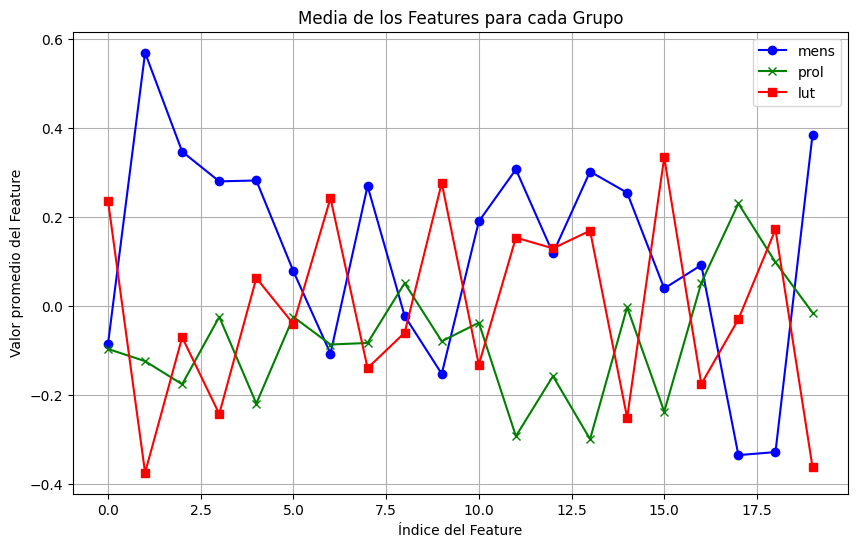

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

media_grupo_1 = np.mean(grupo_1, axis=0)
media_grupo_2 = np.mean(grupo_2, axis=0)
media_grupo_3 = np.mean(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo
plt.plot(media_grupo_1, marker='o', label='mens', color='blue')
plt.plot(media_grupo_2, marker='x', label='prol', color='green')
plt.plot(media_grupo_3, marker='s', label='lut', color='red')

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()



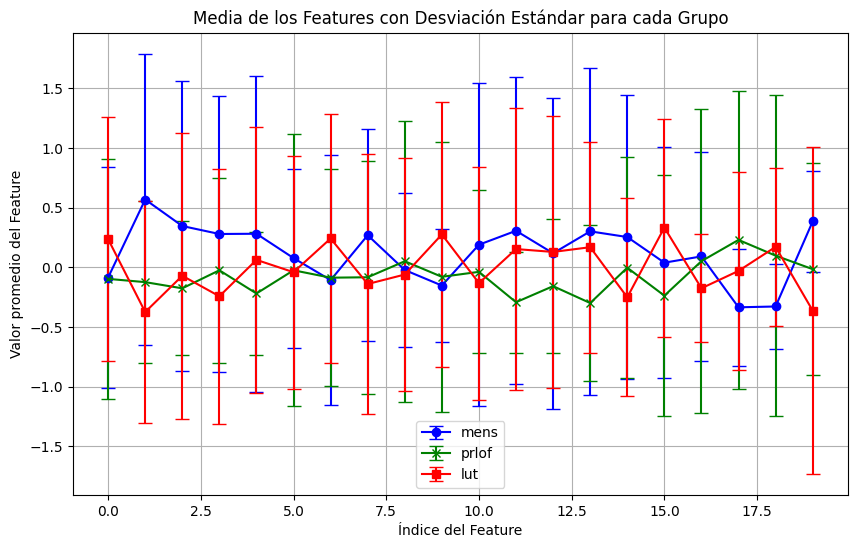

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

std_grupo_1 = np.std(grupo_1, axis=0)
std_grupo_2 = np.std(grupo_2, axis=0)
std_grupo_3 = np.std(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos con barras de error
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo con barras de error (desviación estándar)
plt.errorbar(range(len(media_grupo_1)), media_grupo_1, yerr=std_grupo_1, marker='o', label='mens', color='blue', capsize=5)
plt.errorbar(range(len(media_grupo_2)), media_grupo_2, yerr=std_grupo_2, marker='x', label='prlof', color='green', capsize=5)
plt.errorbar(range(len(media_grupo_3)), media_grupo_3, yerr=std_grupo_3, marker='s', label='lut', color='red', capsize=5)

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features con Desviación Estándar para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


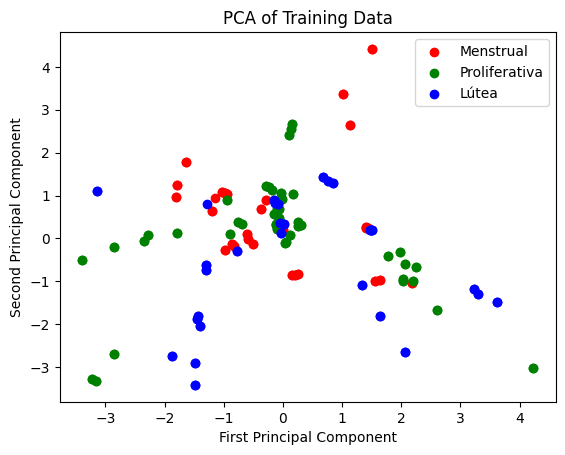

In [ ]:
# graficamos nuestra data a ver cómo se comporta

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Configurar los colores y etiquetas para cada grupo
colors = ['r', 'g', 'b']  # Elige los colores que representarán a los grupos
labels = ['Menstrual', 'Proliferativa', 'Lútea']  # Nombres de los grupos
unique_labels = np.unique(y_train)  # Obtener los grupos únicos

# Graficar y agregar la leyenda
for i, label in enumerate(unique_labels):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1],
                color=colors[i], label=labels[i])

plt.title('PCA of Training Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


In [ ]:
# este es para buscar los mejores parámetros para el svm.

from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Inicializar el modelo GridSearchCV con SVC
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)

# Entrenar el modelo con los datos originales (X_train_scaled)
grid.fit(X_train_scaled, y_train)

# Entrenar el modelo con los datos PCA (X_pca)
grid_pca = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid_pca.fit(X_pca, y_train)

# Mostrar los mejores parámetros y puntajes para cada caso
print("Mejores hiperparámetros (X_train_scaled):", grid.best_params_)
print("Mejor puntaje (X_train_scaled):", grid.best_score_)

print("Mejores hiperparámetros (X_pca):", grid_pca.best_params_)
print("Mejor puntaje (X_pca):", grid_pca.best_score_)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

In [ ]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled, y_train)
y_predict = classifier.predict(X_test_scaled)

In [ ]:
metrics.accuracy_score(y_test, y_predict)

0.2916666666666667

In [ ]:
y_predict2 = grid.predict(X_test_scaled)

accuracy = metrics.accuracy_score(y_test, y_predict2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4666666666666667


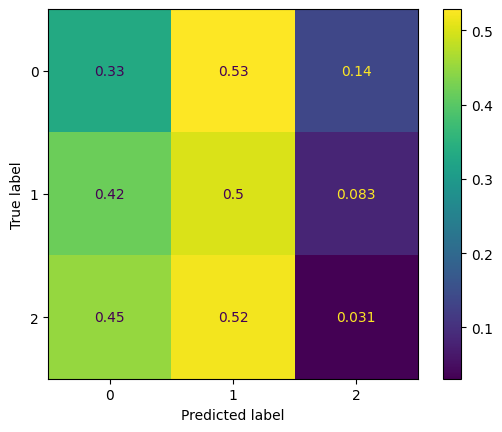

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

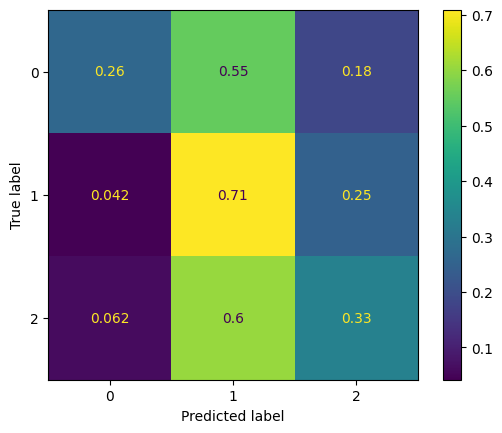

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
classif = svm.SVC()
classif.fit(X_pca, y_train)

X_test_pca = pca.transform(X_test_scaled)  # Asegúrate de transformar tu conjunto de prueba

y_pred = classif.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.4083333333333333


In [ ]:
y_pred2 = grid_pca.predict(X_test_pca)
accuracy = metrics.accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4


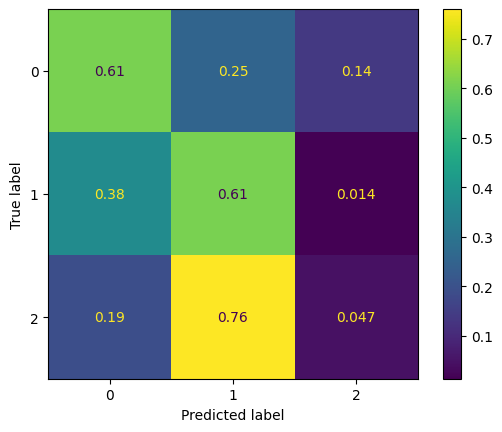

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

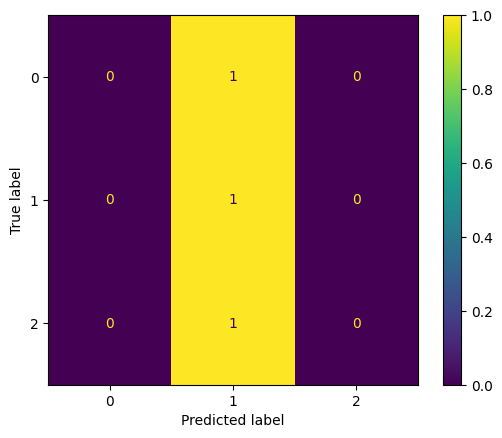

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

Ojo, puede que cross validation esté muy sobreajustado por estar usando a los mismos sujetos, quizá es mejor hacer los folds a mano

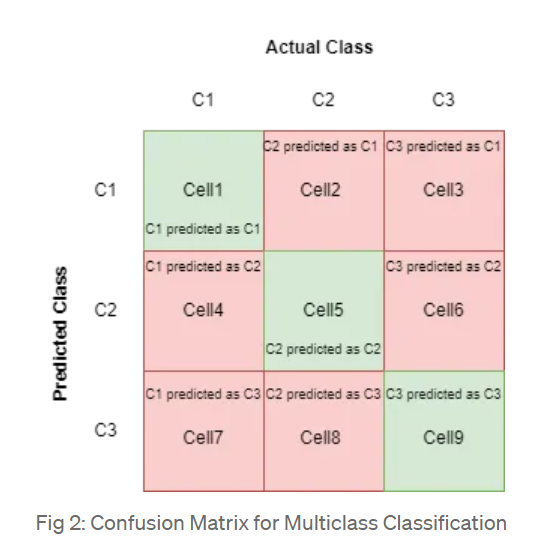

In [ ]:
# Para hacer cross-validation:
from sklearn.model_selection import GroupKFold
import numpy as np

# Número total de grupos
n_groups = X.shape[0]/3

# Crear el array repitiendo cada número 3 veces
groups = np.repeat(np.arange(n_groups), 3) # ponemos aquí nuestros 200 sujetos

#
# Para que esto funcione debo definir X e y al inicio  !!!!!!!!!!!!!!!
#

# Definir GroupKFold
gkf = GroupKFold(n_splits=3) # número de folds

In [ ]:
print(X, y)

             pca_1          pca_2          pca_3          pca_4  \
0   -272080.433317  106343.370677   81042.552558   87977.162766   
1   -272080.433317  106343.370677   81042.552558   87977.162766   
2   -283933.260665  100030.059122  147036.362716   74960.632876   
3   -283933.260665  100030.059122  147036.362716   74960.632876   
4   -279438.220546   77752.937082  138503.711748   39400.863430   
..             ...            ...            ...            ...   
559   -5444.524389 -237172.074867   47410.101139  146765.133951   
560 -217783.903988 -242501.886384   49899.725853  154290.025653   
561 -217783.903988 -242501.886384   49899.725853  154290.025653   
562 -444185.059818  -24785.296647   39410.044799  109202.089633   
563 -444185.059818  -24785.296647   39410.044799  109202.089633   

             pca_5         pca_6          pca_7          pca_8          pca_9  \
0    191457.386973 -4.002363e+04   13763.374720  -96917.167939  -24848.059760   
1    191457.386973 -4.002363e+04 

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        87
           1       0.79      0.96      0.87       144
           2       0.96      0.76      0.85       129

    accuracy                           0.86       360
   macro avg       0.88      0.85      0.86       360
weighted avg       0.87      0.86      0.86       360

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        87
           1       0.68      1.00      0.81       144
           2       0.92      0.53      0.67       129

    accuracy                           0.79       360
   macro avg       0.86      0.79      0.80       360
weighted avg       0.84      0.79      0.78       360

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        87
           1       0.91      0.93      0.92       144
           2       0.94      0.92      0.93       129

    accuracy        

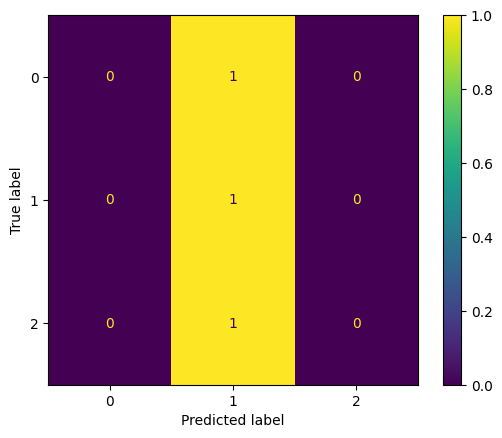

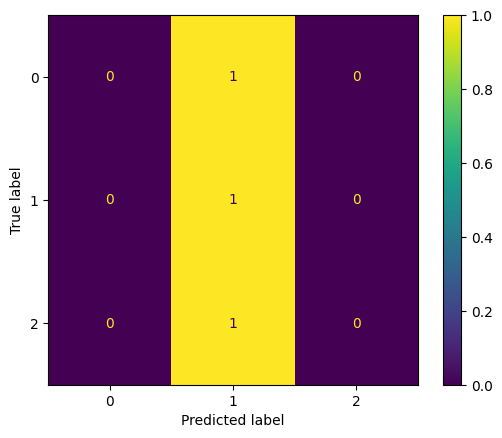

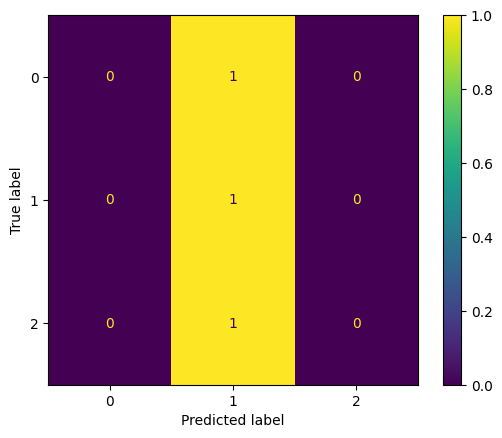

In [ ]:
from sklearn.metrics import classification_report

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba
    X_train2, X_test2 = X.loc[train_idx], X.loc[test_idx]
    y_train2, y_test2 = y.loc[train_idx], y.loc[test_idx]
    classif.fit(X_train2, y_train2)
    y_pred = classif.predict(X_test)
    print(classification_report(y_test, y_pred))
    conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
    plot = metrics.ConfusionMatrixDisplay(conf_mat)
    plot.plot()


In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

In [ ]:
y_pred = random_forest.predict(X_test)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convertir las etiquetas a one-hot encoding (ya que son 3 clases)
y_onehot = to_categorical(y_encoded)

# Dividir en sets de entrenamiento y prueba (X_train, X_test, y_train, y_test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled1, y_train1, epochs=50, batch_size=16, validation_data=(X_test_scaled1, y_test1))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled1, y_test1)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled1)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_test1, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()



In [ ]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test = encoder.fit_transform(y_test)
y_encoded_train = encoder.fit_transform(y_train)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_onehot_test = to_categorical(y_encoded_test)
y_onehot_train = to_categorical(y_encoded_train)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_onehot_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_onehot_test))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_onehot_test)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()
